In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.spatial.distance import cdist
import cv2
from sklearn.preprocessing import StandardScaler

base_dir = "../../data/K_means/cats_and_dogs_filtered/"
train_dir = os.path.join(base_dir, 'train/')
validation_dir = os.path.join(base_dir, 'validation/')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [16]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

validation_cat_fnames = os.listdir( validation_cats_dir )
validation_dog_fnames = os.listdir( validation_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))
print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [17]:
def get_data(file_dir, file_names, img_size = 28):
    image_data = []
    for file_name in file_names:
        img = cv2.imread(os.path.join(file_dir, file_name), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))  
            image_data.append(img.flatten())
    return pd.DataFrame(image_data)

In [18]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0]
    X1 = X[label == 1]
    X2 = X[label == 2]
    plt.plot(X0["x1"], X0["x2"], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1["x1"], X1["x2"], 'go', markersize = 4, alpha = .8)
    plt.plot(X2["x1"], X2["x2"], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

In [19]:
X_train = pd.concat((get_data(train_cats_dir, train_cat_fnames), get_data(train_dogs_dir, train_dog_fnames)))

In [20]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X.iloc[label == 0, :]
    X1 = X.iloc[label == 1, :]
    X2 = X.iloc[label == 2, :]
    plt.plot(X0.iloc[:, 0], X0.iloc[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1.iloc[:, 0], X1.iloc[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2.iloc[:, 0], X2.iloc[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

In [21]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X.iloc[np.random.choice(X.shape[0], k, replace=False)]

In [22]:
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

In [23]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X.iloc[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [24]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in np.array(centers)]) ==
    set([tuple(a) for a in new_centers]))

In [25]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[ 78.45304937  80.63407551  82.68441433 ...  97.63504356  96.27202323
   93.53727009]
 [145.13340228 145.9803516  147.57187177 ... 149.93898656 146.65977249
  144.88004137]]


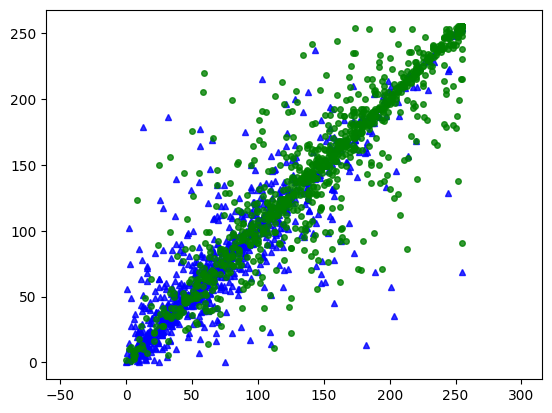

In [26]:
K = 2

(centers, labels, it) = kmeans(X_train, K)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X_train, labels[-1])